###**Problem 5.1:**###
Table 5.14 lists various properties of saturated water in the
temperature range 0–100°C.

(a) Investigate first-order and second-order polynomials that fit saturated vapor enthalpy to temperature in °C. Identify the better model by looking at R2,RMSE, and CV values for both models. Predict the value of saturated vapor enthalpy at 30°C along with 95% CI and 95% prediction intervals.

(b) Repeat the above analysis for specific volume but inves tigate third-order polynomial fits as well. Predict the value of specific volume at 30°C along with 95% CI and 95% prediction intervals.

(c) Calculate the skill factors for the second and third-order models with the first order as the baseline model.

**Solution:**

## Importing Libraries ##

In [ ]:
# Libraries
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

## Defining Units for the problem ##

In [ ]:
#Units
degC = 1; #Celcius degree
m = 1; #meter
kg = 1; #kilograms
kJ = 1; #kilo-jouls

## Data for the problem:##

In [ ]:
d = {'Temperature t (°C)':[0, 10, 20, 30 ,40, 50 ,60 ,70, 80, 90, 100],'Specific volume v (m^3/kg)':[206.3, 106.4, 57.84, 32.93, 19.55, 12.05, 7.679, 5.046, 3.409, 2.361, 1.673],'Sat. vapor enthalpy kJ/kg':[2501.6, 2519.9, 2538.2, 2556.4, 2574.4, 2592.2, 2609.7, 2626.9, 2643.8, 2660.1, 2676]}
df = pd.DataFrame(data=d) #lower case and define vars
df.head() #display()

,Temperature t (°C),Specific volume v (m^3/kg),Sat. vapor enthalpy kJ/kg
0,0,206.30,2501.6
1,10,106.40,2519.9
2,20,57.84,2538.2
3,30,32.93,2556.4
4,40,19.55,2574.4


For the analysis, the data was divided into two parts: 70% (equivalent to 7 data points) for training and 30% (equivalent to 4 data points) for testing the models.

## (a) Task definition: ##
Investigate first-order and second-order polynomials that fit saturated vapor enthalpy to temperature in °C. Identify the better model by looking at R2,RMSE, and CV values for both models. Predict the value of saturated vapor enthalpy at 30°C along with 95% CI and 95% prediction intervals.

### a.1)1st order model: ###

y = Sat. vapor enthalpy kJ/kg

X = Temperature t (°C)

#### Splitting the data ####

In [ ]:
#Define the items to be used for training and testing
train_index = [0,2,3,5,6,8,10]
test_index = [1,4,7,9]

#### Model ####

In [ ]:
# Constructing the matrix for a fist order and second order model

Xl = pd.DataFrame({'intercept': np.ones(df.shape[0]),
                  'x1': df['Temperature t (°C)']})

Xq = pd.DataFrame({'intercept': np.ones(df.shape[0]),
                  'x1': df['Temperature t (°C)'],
                           'x2': df['Temperature t (°C)']**2})

y = df['Sat. vapor enthalpy kJ/kg']

#Linear Model
model1 = sm.OLS(y.iloc[train_index], Xl.iloc[train_index])
results1 = model1.fit()
#Quadratic Model
model2 = sm.OLS(y.iloc[train_index], Xq.iloc[train_index])
results2 = model2.fit()

##### First Order Model Summary #####

Below is the summary for each of the presented models:

In [ ]:
#First-Order Model

print(results1.summary())

                                OLS Regression Results                               
Dep. Variable:     Sat. vapor enthalpy kJ/kg   R-squared:                       0.999
Model:                                   OLS   Adj. R-squared:                  0.999
Method:                        Least Squares   F-statistic:                     8770.
Date:                       Fri, 09 Feb 2024   Prob (F-statistic):           2.63e-09
Time:                               19:58:42   Log-Likelihood:                -12.017
No. Observations:                          7   AIC:                             28.03
Df Residuals:                              5   BIC:                             27.93
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 7 samples were given.



**Comment:** The summary command from the OLS regression model provides a comprehensive overview of the model's performance in predicting the saturated vapor enthalpy in kJ/kg. The model boasts an almost perfect [R-squared](https://en.wikipedia.org/wiki/Coefficient_of_determination) value of 0.999, indicating that it explains 99.9% of the variance in the dependent variable, which is an exceptionally high level of explanatory power. This high R-squared, along with the [adjusted R-squared](https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/#:~:text=The%20Adjusted%20Coefficient%20of%20Determination%20(Adjusted%20R%2Dsquared)%20is,don't%20fit%20the%20model.) also being 0.999, suggests that the model fits the data very well, with minimal overfitting.

The [F-statistic](https://en.wikipedia.org/wiki/F-test) of 8770 with a corresponding Prob (F-statistic) of 2.63e-09 demonstrates that the model is statistically significant, meaning the relationship captured by the model is not due to chance. The coefficients for the intercept and the independent variable (x1) are 2503.3400 and 1.7486, respectively, with the intercept having an extremely low [p-value](https://en.wikipedia.org/wiki/P-value), indicating a very significant intercept term. The standard errors for these coefficients are small, which contributes to the high [t-values](https://en.wikipedia.org/wiki/T-statistic), further affirming the significance of these coefficients.

However, it's important to note that the model was built on a small sample size of only 7 observations, which is below the threshold for the [Omnibus test](https://en.wikipedia.org/wiki/Omnibus_test) to be valid, as indicated by the warning about the omni_normtest. This could potentially limit the generalizability of the model to a wider population. Despite this limitation, the model's diagnostics, such as the [Durbin-Watson statistic](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic) of 0.968, suggest that the residuals are independent, albeit with a slight indication towards positive autocorrelation.

Overall, the OLS regression model appears to be highly effective and statistically significant in predicting the saturated vapor enthalpy, with caution advised due to the small sample size and its implications on the model's general applicability and the validity of some statistical tests.

##### First Order Model Metrics #####

Below we predict the target variables, calculate the performance parameters of the model

In [ ]:
yhat = results1.predict(Xl.iloc[test_index]);

RMSE1 = rmse(y[test_index], yhat, axis=0)

print('The RMSE for the linear model is:', round(RMSE1,3))
print('The CV for the linear model is:', round(RMSE1*100/np.mean(y[test_index]),3),'%')
print('The R^2 for the linear model is:', round(results1.rsquared,3))

The RMSE for the linear model is: 0.978
The CV for the linear model is: 0.038 %
The R^2 for the linear model is: 0.999


##### First Order Model Residual Analysis #####

In [ ]:
# Calculate the residuals
predicted_values = yhat;
residuals = y.iloc[test_index] - predicted_values

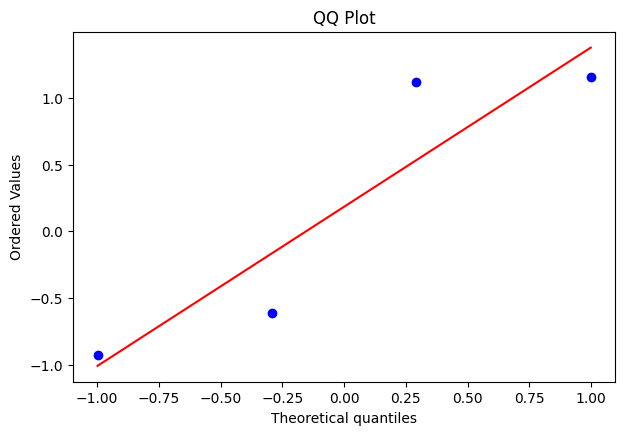

In [ ]:
# Create a list to store the figures
figures = []

# Create a DataFrame for the current model's residuals
residuals_df = pd.DataFrame({'Fitted value': predicted_values, 'Residual': residuals})

# Residuals vs. Fitted Values Plot
fig1 = px.scatter(residuals_df, x='Fitted value', y='Residual', title='Residuals vs. Fitted Values')
#fig1.update_yaxes(range=[-1, 1])
fig1.add_hline(y=0, line_dash="dash")
figures.append(fig1)


# Show the figures
for fig in figures:
    fig.update_layout(
    width=700,  # Width of the figure in pixels
    height=500, # Height of the figure in pixels
    )
    fig.show()
# QQ Plot (Quantile-Quantile Plot)
plt.figure(figsize=(700/100, 500/110))  # Adjust the width and height as needed

qq_fig = stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()



Comment:
First-order models displayed a markedly nonlinear response in the residual plot, highlighting the necessity of adopting a higher-order model to effectively address nonlinear responses.

##### First Order Model Predictions and Intervals #####

Finally, here is presented the prediction from the model at 30 degC together with the CI and PI

In [ ]:
Xnew = pd.DataFrame({'intercept': np.ones(1),
                  'x1': 30*degC})

new_predictions = results1.get_prediction(Xnew);
CI = new_predictions.conf_int(alpha=0.05);
PI = new_predictions.conf_int(obs = True,alpha=0.05);
print('the predicted value of saturated vapor enthalpy at 30°C based on the linear model is',np.round(new_predictions.predicted_mean[0],1), 'kJ/kg')
print('the predicted CI for the value of saturated vapor enthalpy at 30°C based on the linear model are: lower',np.round(CI[0,0],1),' kJ/kg upper:',np.round(CI[0,1],1),' kJ/kg')
print('the predicted PI for the value of saturated vapor enthalpy at 30°C based on the linear model are: lower',np.round(PI[0,0],1),' kJ/kg upper:',np.round(PI[0,1],1),' kJ/kg')

the predicted value of saturated vapor enthalpy at 30°C based on the linear model is 2555.8 kJ/kg
the predicted CI for the value of saturated vapor enthalpy at 30°C based on the linear model are: lower 2554.0  kJ/kg upper: 2557.6  kJ/kg
the predicted PI for the value of saturated vapor enthalpy at 30°C based on the linear model are: lower 2551.3  kJ/kg upper: 2560.3  kJ/kg


**Comment:** The predicted value of saturated vapor enthalpy at 30°C, 2555.8 kJ/kg, along with its confidence interval (CI) from 2554.0 to 2557.6 kJ/kg and prediction interval (PI) from 2551.3 to 2560.3 kJ/kg, were derived from a linear model. Utilizing the model's coefficients, the CI captures the range for the mean estimate with a high degree of confidence, while the PI provides a broader range, accounting for individual prediction variability, reflecting both the precision and reliability of the model's estimations.

### a.2) 2nd order model: ###

We replicated the steps from the first model to develop this second-order model.

y = Sat. vapor enthalpy kJ/kg

X = Temperature t (°C)

Here is presented the summary for each of the analized models:




###### Second Order Model Summary ######

In [ ]:
#Second-Order Model

print(results2.summary())

                                OLS Regression Results                               
Dep. Variable:     Sat. vapor enthalpy kJ/kg   R-squared:                       1.000
Model:                                   OLS   Adj. R-squared:                  1.000
Method:                        Least Squares   F-statistic:                 1.013e+05
Date:                       Fri, 09 Feb 2024   Prob (F-statistic):           3.90e-10
Time:                               19:58:42   Log-Likelihood:               -0.24805
No. Observations:                          7   AIC:                             6.496
Df Residuals:                              4   BIC:                             6.334
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 7 samples were given.



Comment:
The OLS regression results indicate an almost perfect fit (R-squared = 1.000) for predicting the saturation vapor enthalpy (kJ/kg) using the given model. With an F-statistic of approximately 101,300 and a very low probability value (3.90e-10), the model's predictors are highly significant. The coefficients for the intercept, x1, and x2 are 2501.3343, 1.8847, and -0.0014, respectively, with x and x^2 showing statistical significance in their contribution to the model. However, a caution is noted regarding potential multicollinearity or numerical issues due to a large [condition number](https://en.wikipedia.org/wiki/Condition_number#:~:text=The%20condition%20number%20is%20derived,the%20data%20in%20the%20problem.) (1.13e+04). The model's diagnostics suggest careful interpretation, especially since the analysis is based on a small sample size (7 observations), which also limits the validity of the Omnibus test for normality.

⚠ Important ⚠
The summary of the developed model indicates an R-squared value of 1.000, which stems from rounding to three decimal places. Nonetheless, it's important to note that the actual value isn't exactly 1.0, as evidenced by the RMSE value provided below, which is not zero.

###### Second Order Model Metrics ######

Here is presented the calculation of the parameters

In [ ]:
yhat = results2.predict(Xq.iloc[test_index]);

RMSE2 = rmse(y[test_index], yhat, axis=0)

print('The RMSE for the second order model is:', round(RMSE2,3))
print('The CV for the second order model is:', round(RMSE2*100/np.mean(y[test_index]),3),'%')
print('The R^2 for the second order model is:', round(results2.rsquared,3))

The RMSE for the second order model is: 0.183
The CV for the second order model is: 0.007 %
The R^2 for the second order model is: 1.0


##### Second Order Model Residual Analysis #####

In [ ]:
# Calculate the residuals
predicted_values = yhat;
residuals = y.iloc[test_index] - predicted_values

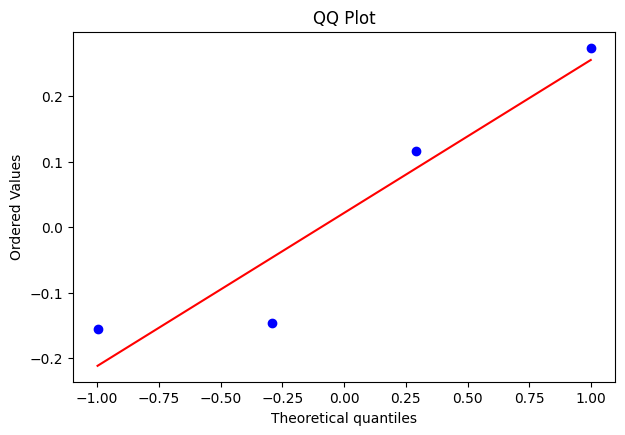

In [ ]:
# Create a list to store the figures
figures = []

# Create a DataFrame for the current model's residuals
residuals_df = pd.DataFrame({'Fitted value': predicted_values, 'Residual': residuals})

# Residuals vs. Fitted Values Plot
fig1 = px.scatter(residuals_df, x='Fitted value', y='Residual', title='Residuals vs. Fitted Values')
#fig1.update_yaxes(range=[-1, 1])
fig1.add_hline(y=0, line_dash="dash")
figures.append(fig1)


# Show the figures
for fig in figures:
    fig.update_layout(
    width=700,  # Width of the figure in pixels
    height=500, # Height of the figure in pixels
    )
    fig.show()
# QQ Plot (Quantile-Quantile Plot)
plt.figure(figsize=(700/100, 500/110))  # Adjust the width and height as needed

qq_fig = stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()



Comment:

Second-order models demonstrated a more uniform response in the residual plot, further supporting the use of this second-order model to represent the saturation vapor enthalpy.

##### Second Order Model Predictions and Intervals #####

Finally, here is presented the prediction from the model at 30C together with the CI and PI

In [ ]:
Xnew = pd.DataFrame({'intercept': np.ones(1),
                  'x1': 30*degC,'x2': (30*degC)**2})

new_predictions = results2.get_prediction(Xnew);
CI = new_predictions.conf_int(alpha=0.05);
PI = new_predictions.conf_int(obs = True,alpha=0.05);
print('the predicted value of saturated vapor enthalpy at 30°C based on the second order model is',np.round(new_predictions.predicted_mean[0],1), 'kJ/kg')
print('the predicted CI for the value of saturated vapor enthalpy at 30°C based on the second order model are: lower',np.round(CI[0,0],1),' kJ/kg upper:',np.round(CI[0,1],1),' kJ/kg')
print('the predicted PI for the value of saturated vapor enthalpy at 30°C based on the second order model are: lower',np.round(PI[0,0],1),' kJ/kg upper:',np.round(PI[0,1],1),' kJ/kg')

the predicted value of saturated vapor enthalpy at 30°C based on the second order model is 2556.7 kJ/kg
the predicted CI for the value of saturated vapor enthalpy at 30°C based on the second order model are: lower 2556.2  kJ/kg upper: 2557.1  kJ/kg
the predicted PI for the value of saturated vapor enthalpy at 30°C based on the second order model are: lower 2555.6  kJ/kg upper: 2557.7  kJ/kg


### General Comment: Comparing first and second order models ###

The R^2, RMSE, and CV scores suggest that both models perform well, with the second-order model showing a lower RMSE and CV, hinting at its potential advantage. Physical principles suggest that a second-order model would be more appropriate. A detailed analysis of residuals is crucial for a more informed model choice. Unfortunately, this analysis lacks a comprehensive residual analysis, which could have offered critical insights into selecting the most suitable model.

In [ ]:
fig = go.Figure(data=go.Scatter(x=df['Temperature t (°C)'], y=df['Sat. vapor enthalpy kJ/kg'],
                                mode='markers', marker=dict(color='blue'), name='Data Points'))

# Calculate line for the 1st order model
x_line = np.linspace(df['Temperature t (°C)'].min(), df['Temperature t (°C)'].max(), 100)
y_line1 = results1.params[0] + results1.params[1] * x_line

# Add 1st order model line
fig.add_trace(go.Scatter(x=x_line, y=y_line1, mode='lines', line=dict(dash='dash', color='red', width=1), name='1st Order Model'))

# Add 2nd order model predictions
fig.add_trace(go.Scatter(x=df['Temperature t (°C)'], y=results2.predict(Xq), mode='lines', line=dict(dash='dot', color='green', width=1), name='2nd Order Model'))

# Set figure layout
fig.update_layout(title='Saturated Vapor Enthalpy vs. Temperature',
                  xaxis_title='Temperature [°C]',
                  yaxis_title='Saturated Vapor Enthalpy [kJ/kg]',
                  legend_title='Legend',
                  width=800,  # Width of the figure in pixels
                  height=600, # Height of the figure in pixels
                  )

# Show figure
fig.show()

### a.3) Calculate the skill factors for the second order model with the first order as the baseline model.###

In [ ]:
#Calculating Skill Factor

def get_skillfactor(RMSE1,RMSE2):
  SF = (RMSE1-RMSE2)*100/RMSE1
  return SF

SFlqa =  get_skillfactor(RMSE1,RMSE2)

print('The skill factor comparing the first to second order model is: SF',np.round(SFlqa,1),' %')

The skill factor comparing the first to second order model is: SF 81.3  %


Comment: Since the Skill Factor (SF) is greater than 0, it indicates that the second-order model outperforms the first-order model when evaluated with the test data.

## b) Repeat the above analysis for specific volume but investigate third-order polynomial fits as well. Predict the value of specific volume at 30°C along with 95% CI and 95% prediction intervals.##

###b.1) Defining the 1st order model:###

y = Specific volume v (m^3/kg)

X = Temperature t (°C)


The process employed in developing the models adheres to the same steps outlined in part a).

⚠⚠⚠⚠⚠⚠⚠⚠⚠

Although the problem asked us to investigate polynomial models, we are also interested in evaluating an inverse model (1/x).

⚠⚠⚠⚠⚠⚠⚠⚠⚠

#### Model ###

In [ ]:
# Constructing the matrix for a fist order and second order model

Xl = pd.DataFrame({'intercept': np.ones(df.shape[0]),
                  'x1': df['Temperature t (°C)']})

Xq = pd.DataFrame({'intercept': np.ones(df.shape[0]),
                  'x1': df['Temperature t (°C)'],
                           'x2': df['Temperature t (°C)']**2})

Xc = pd.DataFrame({'intercept': np.ones(df.shape[0]),
                  'x1': df['Temperature t (°C)'],
                           'x2': df['Temperature t (°C)']**2,
                           'x3': df['Temperature t (°C)']**3})

Xinv = pd.DataFrame({'intercept': np.ones(df.shape[0]),
                     'x1': df['Temperature t (°C)'].astype(float)**(-1)})


Xinv2 = pd.DataFrame({'x1': df['Temperature t (°C)'].astype(float)**(-1)})

train_indexinv = [2,3,5,6,8,10]

y = df['Specific volume v (m^3/kg)']

#Linear Model
model1 = sm.OLS(y[train_index], Xl.iloc[train_index])
results1 = model1.fit()
#Quadratic Model
model2 = sm.OLS(y[train_index], Xq.iloc[train_index])
results2 = model2.fit()
#Cubic Model
model3 = sm.OLS(y[train_index], Xc.iloc[train_index])
results3 = model3.fit()
#1/x Model
model4 = sm.OLS(y[train_indexinv ], Xinv.iloc[train_indexinv ])
results4 = model4.fit()

model5 = sm.OLS(y[train_indexinv ], Xinv2.iloc[train_indexinv ])
results5 = model5.fit()

##### First Order Model Summary #####

Here is presented the summary for each of the analized models:

In [ ]:
#First-Order Model
print(results1.summary())

                                OLS Regression Results                                
Dep. Variable:     Specific volume v (m^3/kg)   R-squared:                       0.608
Model:                                    OLS   Adj. R-squared:                  0.530
Method:                         Least Squares   F-statistic:                     7.771
Date:                        Fri, 09 Feb 2024   Prob (F-statistic):             0.0386
Time:                                19:58:43   Log-Likelihood:                -36.191
No. Observations:                           7   AIC:                             76.38
Df Residuals:                               5   BIC:                             76.27
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 7 samples were given.



Comment: The OLS regression analysis on the specific volume (m^3/kg) yielded an R-squared value of 0.608, indicating that approximately 60.8% of the variance in the specific volume can be explained by the model. The adjusted R-squared value of 0.530 suggests a moderate fit when adjusting for the number of predictors. With an F-statistic of 7.771 and a significant p-value of 0.0386, the model demonstrates statistical significance. The coefficients for the intercept and x are 125.8914 and -1.6452, respectively, with the intercept being significantly different from zero (p=0.015) and x showing a negative relationship with the specific volume (p=0.039). However, the small sample size (7 observations) limits the reliability of these results and the normality tests (Omnibus and Jarque-Bera) are not valid due to less than 8 observations, indicating a need for cautious interpretation of the findings.

##### First Order Model Metrics #####

Here is presented the calculation of the parameters

In [ ]:
yhat = results1.predict(Xl.iloc[test_index]);

RMSE1 = rmse(y.iloc[test_index], yhat, axis=0)

print('The RMSE for the linear model is:', round(RMSE1,3))
print('The CV for the linear model is:', round(RMSE1*100/np.mean(y.iloc[test_index]),3),'%')
print('The R^2 for the linear model is:', round(results1.rsquared,3))

The RMSE for the linear model is: 23.909
The CV for the linear model is: 71.714 %
The R^2 for the linear model is: 0.608


##### First Order Model Residual Analysis #####

In [ ]:
# Calculate the residuals
predicted_values = yhat
residuals = y.iloc[test_index] - predicted_values

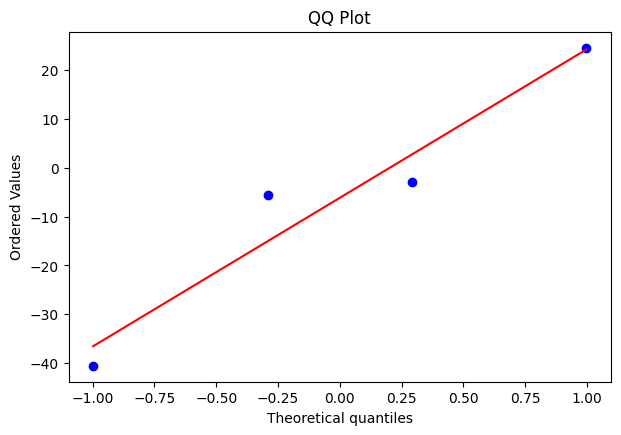

In [ ]:
# Create a list to store the figures
figures = []

# Create a DataFrame for the current model's residuals
residuals_df = pd.DataFrame({'Fitted value': predicted_values, 'Residual': residuals})

# Residuals vs. Fitted Values Plot
fig1 = px.scatter(residuals_df, x='Fitted value', y='Residual', title='Residuals vs. Fitted Values')
#fig1.update_yaxes(range=[-1, 1])
fig1.add_hline(y=0, line_dash="dash")
figures.append(fig1)

# Show the figures
for fig in figures:
    fig.update_layout(
    width=700,  # Width of the figure in pixels
    height=500, # Height of the figure in pixels
    )
    fig.show()

# QQ Plot (Quantile-Quantile Plot)
plt.figure(figsize=(700/100, 500/110))  # Adjust the width and height as needed

qq_fig = stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()

Comment:
The previous analysis reveals that while the linear model moderately succeeds in approximating the trend of  specific volume, the residual analysis points to certain non-linear relationships that the model fails to capture.

##### First Order Model Predictions and Intervals #####

Finally, here is presented the prediction from the model at 30C together with the CI and PI

In [ ]:
Xnew = pd.DataFrame({'intercept': np.ones(1),
                  'x1': 30*degC})

new_predictions = results1.get_prediction(Xnew);
CI = new_predictions.conf_int(alpha=0.05);
PI = new_predictions.conf_int(obs = True,alpha=0.05);
if np.round(PI[0,0],1) < 0:
 a = 0
else:
 a = np.round(PI[0,0],1)
print('the predicted value of Specific volume at 30°C based on the linear model is',np.round(new_predictions.predicted_mean[0],1), 'm^3/kg')
print('the predicted CI for the value of Specific volume at 30°C based on the linear model are: lower',np.round(CI[0,0],1),' kJ/kg upper:',np.round(CI[0,1],1),' m^3/kg')
print('the predicted PI for the value of Specific volume at 30°C based on the linear model are: lower',a,' kJ/kg upper:',np.round(PI[0,1],1),' m^3/kg')

the predicted value of Specific volume at 30°C based on the linear model is 76.5 m^3/kg
the predicted CI for the value of Specific volume at 30°C based on the linear model are: lower 20.1  kJ/kg upper: 133.0  m^3/kg
the predicted PI for the value of Specific volume at 30°C based on the linear model are: lower 0  kJ/kg upper: 217.8  m^3/kg


###b.2) For the second order model:###

y = Specific volume v (m^3/kg)

X = Temperature t (°C)

Here is presented the summary for each of the analized models:




##### Second Order Model Summary #####

In [ ]:
#Second-Order Model

print(results2.summary())

                                OLS Regression Results                                
Dep. Variable:     Specific volume v (m^3/kg)   R-squared:                       0.918
Model:                                    OLS   Adj. R-squared:                  0.878
Method:                         Least Squares   F-statistic:                     22.53
Date:                        Fri, 09 Feb 2024   Prob (F-statistic):            0.00665
Time:                                19:58:43   Log-Likelihood:                -30.699
No. Observations:                           7   AIC:                             67.40
Df Residuals:                               4   BIC:                             67.24
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 7 samples were given.



Comment: The OLS regression results for predicting specific volume show a strong R-squared value of 0.918, indicating that the model explains a significant portion of the variability in the data. However, the adjusted R-squared drops to 0.878, suggesting that every predictor is not equally useful, or there might be some overfitting given the small sample size of 7 observations. The F-statistic and its associated p-value signify that the model is statistically significant. Coefficients for the intercept and predictors x and x^2 are significant, as indicated by their p-values, but the model's reliability might be questioned due to the high condition number, pointing to potential multicollinearity or numerical issues. The absence of a valid omnibus norm test due to the small sample size further underscores the need for cautious interpretation of the results.

##### Second Order Model Metrics #####

Here is presented the calculation of the parameters

In [ ]:
yhat2 = results2.predict(Xq.iloc[test_index]);

RMSE2 = rmse(y.iloc[test_index], yhat2, axis=0)


print('The RMSE for the second order model is:', round(RMSE2,3))
print('The CV for the second order model is:', round(RMSE2*100/np.mean(y.iloc[test_index]),3),'%')
print('The R^2 for the second order model is:', round(results2.rsquared,3))

The RMSE for the second order model is: 16.274
The CV for the second order model is: 48.814 %
The R^2 for the second order model is: 0.918


##### Second Order Model Residual Analysis #####

In [ ]:
# Calculate the residuals
predicted_values = yhat2;
residuals = y.iloc[test_index] - predicted_values

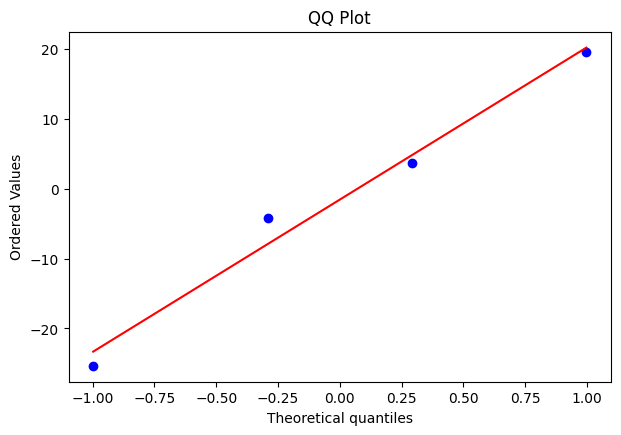

In [ ]:
# Create a list to store the figures
figures = []

# Create a DataFrame for the current model's residuals
residuals_df = pd.DataFrame({'Fitted value': predicted_values, 'Residual': residuals})

# Residuals vs. Fitted Values Plot
fig1 = px.scatter(residuals_df, x='Fitted value', y='Residual', title='Residuals vs. Fitted Values')
#fig1.update_yaxes(range=[-1, 1])
fig1.add_hline(y=0, line_dash="dash")
figures.append(fig1)

# Show the figures
for fig in figures:
    fig.update_layout(
    width=700,  # Width of the figure in pixels
    height=500, # Height of the figure in pixels
    )
    fig.show()

# QQ Plot (Quantile-Quantile Plot)
plt.figure(figsize=(700/100, 500/110))  # Adjust the width and height as needed

qq_fig = stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()



Comment:
The second-order model demonstrates a nonlinear response in the residual plot, indicating the necessity to explore models of higher order.

##### Second Order Model Predictions and Intervals #####

Finally, here is presented the prediction from the model at 30C together with the CI and PI

In [ ]:
Xnew = pd.DataFrame({'intercept': np.ones(1),
                  'x1': 30*degC,'x2': (30*degC)**2})

new_predictions = results2.get_prediction(Xnew);
CI = new_predictions.conf_int(alpha=0.05);
PI = new_predictions.conf_int(obs = True,alpha=0.05);
if np.round(PI[0,0],1) < 0:
 a = 0
else:
 a = np.round(PI[0,0],1)
print('the predicted value of Specific volume at 30°C based on the second order model is',np.round(new_predictions.predicted_mean[0],1), 'm^3/kg')
print('the predicted CI for the value of Specific volume at 30°C based on the second order model are: lower',np.round(CI[0,0],1),' kJ/kg upper:',np.round(CI[0,1],1),' m^3/kg')
print('the predicted PI for the value of Specific volume at 30°C based on the second order model are: lower',a,' kJ/kg upper:',np.round(PI[0,1],1),' m^3/kg')

the predicted value of Specific volume at 30°C based on the second order model is 51.9 m^3/kg
the predicted CI for the value of Specific volume at 30°C based on the second order model are: lower 16.2  kJ/kg upper: 87.6  m^3/kg
the predicted PI for the value of Specific volume at 30°C based on the second order model are: lower 0  kJ/kg upper: 131.7  m^3/kg


###b.3) For the third order model:###

y = Specific volume v (m^3/kg)

X = Temperature t (°C)

Here is presented the summary for each of the analized models:




##### Third Order Model Summary #####

In [ ]:
#Third-Order Model

print(results3.summary())

                                OLS Regression Results                                
Dep. Variable:     Specific volume v (m^3/kg)   R-squared:                       0.993
Model:                                    OLS   Adj. R-squared:                  0.986
Method:                         Least Squares   F-statistic:                     137.4
Date:                        Fri, 09 Feb 2024   Prob (F-statistic):            0.00104
Time:                                19:58:44   Log-Likelihood:                -22.219
No. Observations:                           7   AIC:                             52.44
Df Residuals:                               3   BIC:                             52.22
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 7 samples were given.



Comment: The OLS regression results, showcasing a very high R-squared value of 0.993, indicate that the model excellently captures the variability in the specific volume v (m^3/kg). An adjusted R-squared of 0.986 confirms that the inclusion of additional predictors (up to three in this case) contributes significantly to the model's predictive power. The F-statistic and its associated low p-value highlight the overall statistical significance of the model. Individual coefficients for the intercept, x, x^2, and x^3, are statistically significant, as shown by their respective t-values and p-values. Despite the model's strong performance, caution is advised due to a very high condition number, suggesting potential multicollinearity or other numerical issues, which could affect the reliability of the coefficient estimates. Additionally, the warning about the omnibus norm test being invalid for small samples (less than 8 observations) underlines the need for careful interpretation of the statistical tests and model diagnostics.







##### Third Order Model Metrics #####

Here is presented the calculation of the parameters

In [ ]:
yhat3 = results3.predict(Xc.iloc[test_index]);

RMSE3 = rmse(y.iloc[test_index], yhat3, axis=0)


print('The RMSE for the second order model is:', round(RMSE3,3))
print('The CV for the second order model is:', round(RMSE3*100/np.mean(y.iloc[test_index]),3),'%')
print('The R^2 for the second order model is:', round(results3.rsquared,3))

The RMSE for the second order model is: 9.951
The CV for the second order model is: 29.848 %
The R^2 for the second order model is: 0.993


##### Third Order Model Residual Analysis #####

In [ ]:
# Calculate the residuals
predicted_values = yhat3;
residuals = y.iloc[test_index] - predicted_values

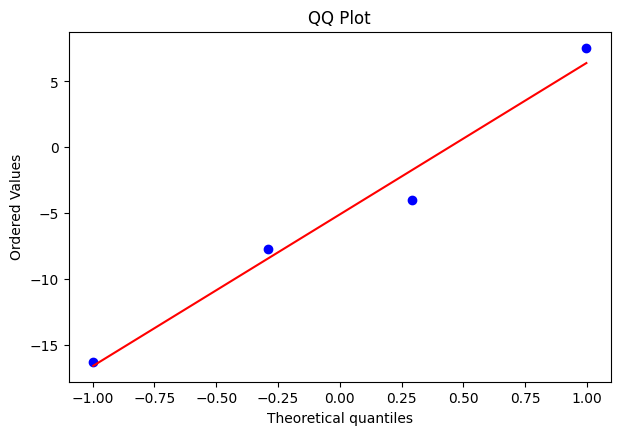

In [ ]:
# Create a list to store the figures
figures = []

# Create a DataFrame for the current model's residuals
residuals_df = pd.DataFrame({'Fitted value': predicted_values, 'Residual': residuals})

# Residuals vs. Fitted Values Plot
fig1 = px.scatter(residuals_df, x='Fitted value', y='Residual', title='Residuals vs. Fitted Values')
#fig1.update_yaxes(range=[-1, 1])
fig1.add_hline(y=0, line_dash="dash")
figures.append(fig1)


# Show the figures
for fig in figures:
    fig.update_layout(
    width=700,  # Width of the figure in pixels
    height=500, # Height of the figure in pixels
    )
    fig.show()

# QQ Plot (Quantile-Quantile Plot)
plt.figure(figsize=(700/100, 500/110))  # Adjust the width and height as needed

qq_fig = stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()



Comment:
The third-order model shows that the majority of the tested points adhere to the expected pattern along the horizontal line, with the exception of just one point.

##### Third Order Model Predictions and Intervals #####

Finally, here is presented the prediction from the model at 30C together with the CI and PI

In [ ]:
Xnew = pd.DataFrame({'intercept': np.ones(1),
                  'x1': 30*degC,'x2': (30*degC)**2,'x3': (30*degC)**3})

new_predictions = results3.get_prediction(Xnew);
CI = new_predictions.conf_int(alpha=0.05);
PI = new_predictions.conf_int(obs = True,alpha=0.05);
if np.round(PI[0,0],1) < 0:
 a = 0
else:
 a = np.round(PI[0,0],1)
print('the predicted value of Specific volume at 30°C based on the second order model is',np.round(new_predictions.predicted_mean[0],1), 'm^3/kg')
print('the predicted CI for the value of Specific volume at 30°C based on the second order model are: lower',np.round(CI[0,0],1),' kJ/kg upper:',np.round(CI[0,1],1),' m^3/kg')
print('the predicted PI for the value of Specific volume at 30°C based on the second order model are: lower',a,' kJ/kg upper:',np.round(PI[0,1],1),' m^3/kg')

the predicted value of Specific volume at 30°C based on the second order model is 31.2 m^3/kg
the predicted CI for the value of Specific volume at 30°C based on the second order model are: lower 12.8  kJ/kg upper: 49.6  m^3/kg
the predicted PI for the value of Specific volume at 30°C based on the second order model are: lower 0  kJ/kg upper: 64.8  m^3/kg


##### Inverse Model Summary with Intercept #####

In [ ]:
print(results4.summary())

                                OLS Regression Results                                
Dep. Variable:     Specific volume v (m^3/kg)   R-squared:                       0.996
Model:                                    OLS   Adj. R-squared:                  0.994
Method:                         Least Squares   F-statistic:                     890.9
Date:                        Fri, 09 Feb 2024   Prob (F-statistic):           7.50e-06
Time:                                19:58:44   Log-Likelihood:                -10.284
No. Observations:                           6   AIC:                             24.57
Df Residuals:                               4   BIC:                             24.15
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



##### Inverse Model Summary without Intercept #####

In [ ]:
print(results5.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Specific volume v (m^3/kg)   R-squared (uncentered):                   0.924
Model:                                    OLS   Adj. R-squared (uncentered):              0.909
Method:                         Least Squares   F-statistic:                              60.65
Date:                        Fri, 09 Feb 2024   Prob (F-statistic):                    0.000559
Time:                                19:58:44   Log-Likelihood:                         -20.747
No. Observations:                           6   AIC:                                      43.49
Df Residuals:                               5   BIC:                                      43.28
Df Model:                                   1                                                  
Covariance Type:                    nonrobust                                                  
                 coef    std err        

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



Comment: The comparative analysis of the Inverse Model Summaries, with and without an intercept, presents insightful contrasts in modeling specific volume v (m^3/kg). The model including an intercept achieved an R-squared of 0.996 and an adjusted R-squared of 0.94, indicating a high degree of variance explanation with a slight penalty for the number of predictors. The significant F-statistic and its corresponding p-value reinforce the model's statistical strength. Conversely, the model without an intercept showed a slightly lower, uncentered R-squared of 0.924 and adjusted R-squared of 0.909, still demonstrating substantial explanatory power but suggesting that including an intercept may provide a more accurate fit. Both models exhibit a large condition number, hinting at potential multicollinearity or numerical issues, which could affect the precision of the coefficient estimates. Additionally, the small sample size (7 observations) limits the validity of omnibus norm tests, highlighting the need for cautious interpretation of model diagnostics.

##### Inverse Model Residual Analysis without Intercept  #####

In [ ]:
# Calculate the residuals
predicted_values = results5.predict(Xinv2.iloc[test_index]);
residuals = y.iloc[test_index] - predicted_values

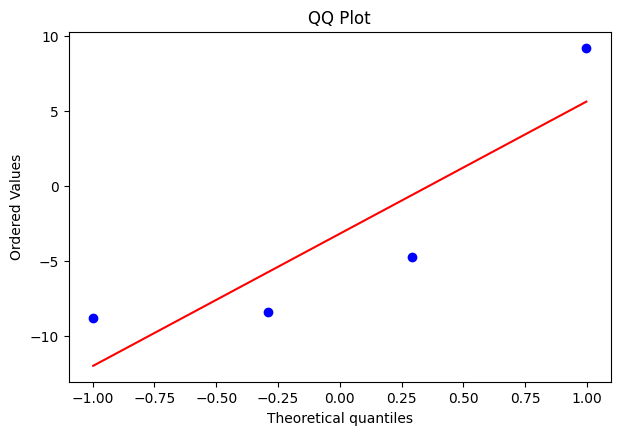

In [ ]:
# Create a list to store the figures
figures = []

# Create a DataFrame for the current model's residuals
residuals_df = pd.DataFrame({'Fitted value': predicted_values, 'Residual': residuals})

# Residuals vs. Fitted Values Plot
fig1 = px.scatter(residuals_df, x='Fitted value', y='Residual', title='Residuals vs. Fitted Values')
#fig1.update_yaxes(range=[-1, 1])
fig1.add_hline(y=0, line_dash="dash")
figures.append(fig1)


# Show the figures
for fig in figures:
    fig.update_layout(
    width=700,  # Width of the figure in pixels
    height=500, # Height of the figure in pixels
    )
    fig.show()
# QQ Plot (Quantile-Quantile Plot)
plt.figure(figsize=(700/100, 500/110))  # Adjust the width and height as needed

qq_fig = stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()



Comment:
Inverse models tend to exhibit a more favorable shape in the residuals' response compared to previous models.

### Plotting All Models ###

In [ ]:
fig = go.Figure(data=go.Scatter(x=df['Temperature t (°C)'], y=df['Specific volume v (m^3/kg)'],
                                mode='markers', marker=dict(color='black'), name='Data Points'))

# Calculate line for the 1st order model
x_line = np.linspace(df['Temperature t (°C)'].min(), df['Temperature t (°C)'].max(), 100)
y_line1 = results1.params[0] + results1.params[1] * x_line

# Add 1st order model line
fig.add_trace(go.Scatter(x=x_line, y=y_line1, mode='lines', line=dict(dash='dash', color='red', width=1), name='1st Order Model'))

# Add 2nd order model predictions
fig.add_trace(go.Scatter(x=df['Temperature t (°C)'], y=results2.predict(Xq), mode='lines', line=dict(dash='dot', color='green', width=1), name='2nd Order Model'))

# Add 3rd order model predictions
fig.add_trace(go.Scatter(x=df['Temperature t (°C)'], y=results3.predict(Xc), mode='lines', line=dict(dash='dot', color='blue', width=1), name='3rd Order Model'))

# Add Inverse model predictions
fig.add_trace(go.Scatter(x=df['Temperature t (°C)'], y=results5.predict(Xinv2), mode='lines', line=dict(dash='dot', color='magenta', width=1), name='Inverse Model'))


# Set figure layout
fig.update_layout(title='Specific volume vs. Temperature',
                  xaxis_title='Temperature [°C]',
                  yaxis_title='Specific volume v (m^3/kg)',
                  legend_title='Legend',
                  width=800,  # Width of the figure in pixels
                  height=600, # Height of the figure in pixels
                  )

# Show figure
fig.show()

### General Comment ###

Considering the R^2, RMSE, and CV metrics along with visual analysis, the third-order polynomial model exhibits superior performance among polynomial alternatives. However, the inverse model, due to its greater accuracy and simplicity, is chosen as the optimal model in this analysis.

###b.3) Calculate the skill factors for the second and third-order models with the first order as the baseline model.###

In [ ]:
#Calculating Skill Factor

SFlqb =  get_skillfactor(RMSE1,RMSE2)
SFlcb =  get_skillfactor(RMSE1,RMSE3)

print('Tnhe skill factor comparing the first to second order model is: SF',np.round(SFlqb,1),' %')

print('Tnhe skill factor comparing the first to third order model is: SF',np.round(SFlcb,1),' %')

Tnhe skill factor comparing the first to second order model is: SF 31.9  %
Tnhe skill factor comparing the first to third order model is: SF 58.4  %


Comment: Since the Skill Factor (SF) is greater than 0, it indicates that the third and second-order models outperform the first-order model when evaluated with the test data.